In [1]:
import pandas as pd
file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)
data


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)

imputer = SimpleImputer(strategy="median")
numerical_data = data.select_dtypes(include=['number'])
numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

categorical_data = data.select_dtypes(exclude=['number'])
data_cleaned = pd.concat([numerical_data, categorical_data], axis=1)

data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")


SVM Model Accuracy: 0.73
Random Forest Model Accuracy: 0.99


In [3]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

data_no_outliers = remove_outliers(data_cleaned)

X = data_no_outliers.drop(columns=['class'])
y = data_no_outliers['class']

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy after Outlier Removal: {accuracy_svm:.2f}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy after Outlier Removal: {accuracy_rf:.2f}")

SVM Model Accuracy after Outlier Removal: 0.33
Random Forest Model Accuracy after Outlier Removal: 1.00


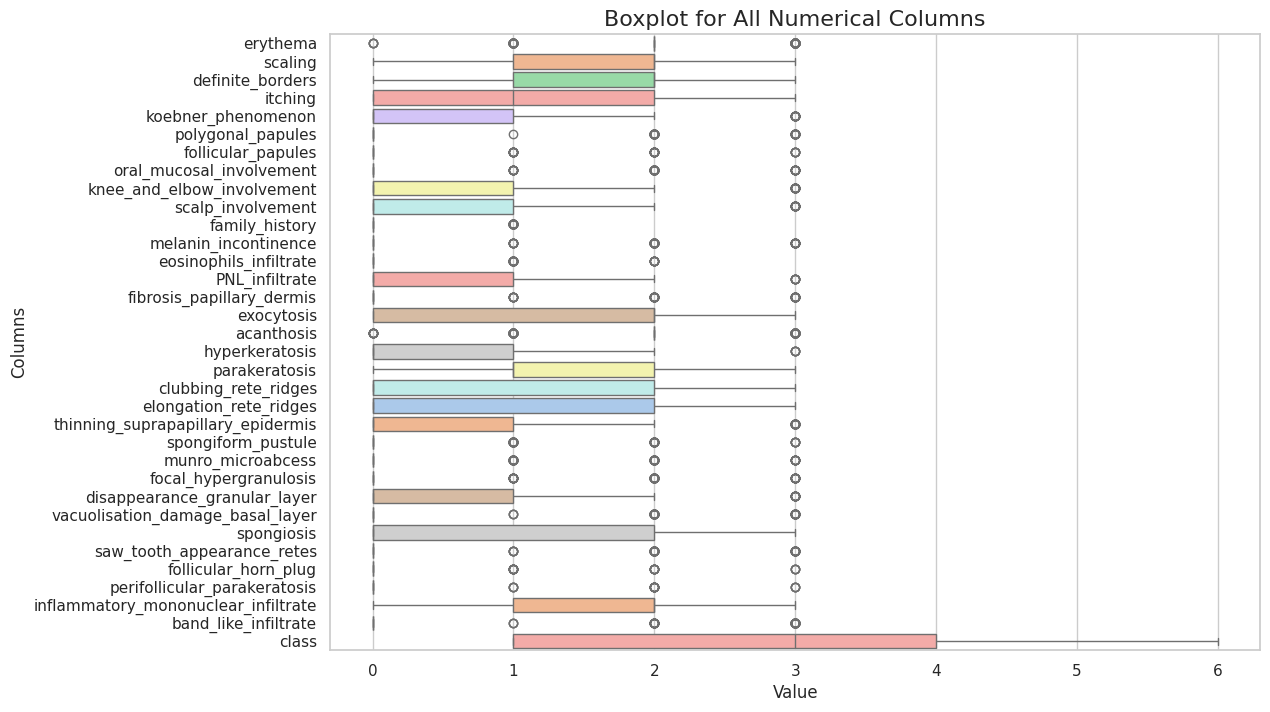

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Select numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Create a single boxplot for all numerical data
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns, orient="h", palette="pastel")
plt.title("Boxplot for All Numerical Columns", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.show()


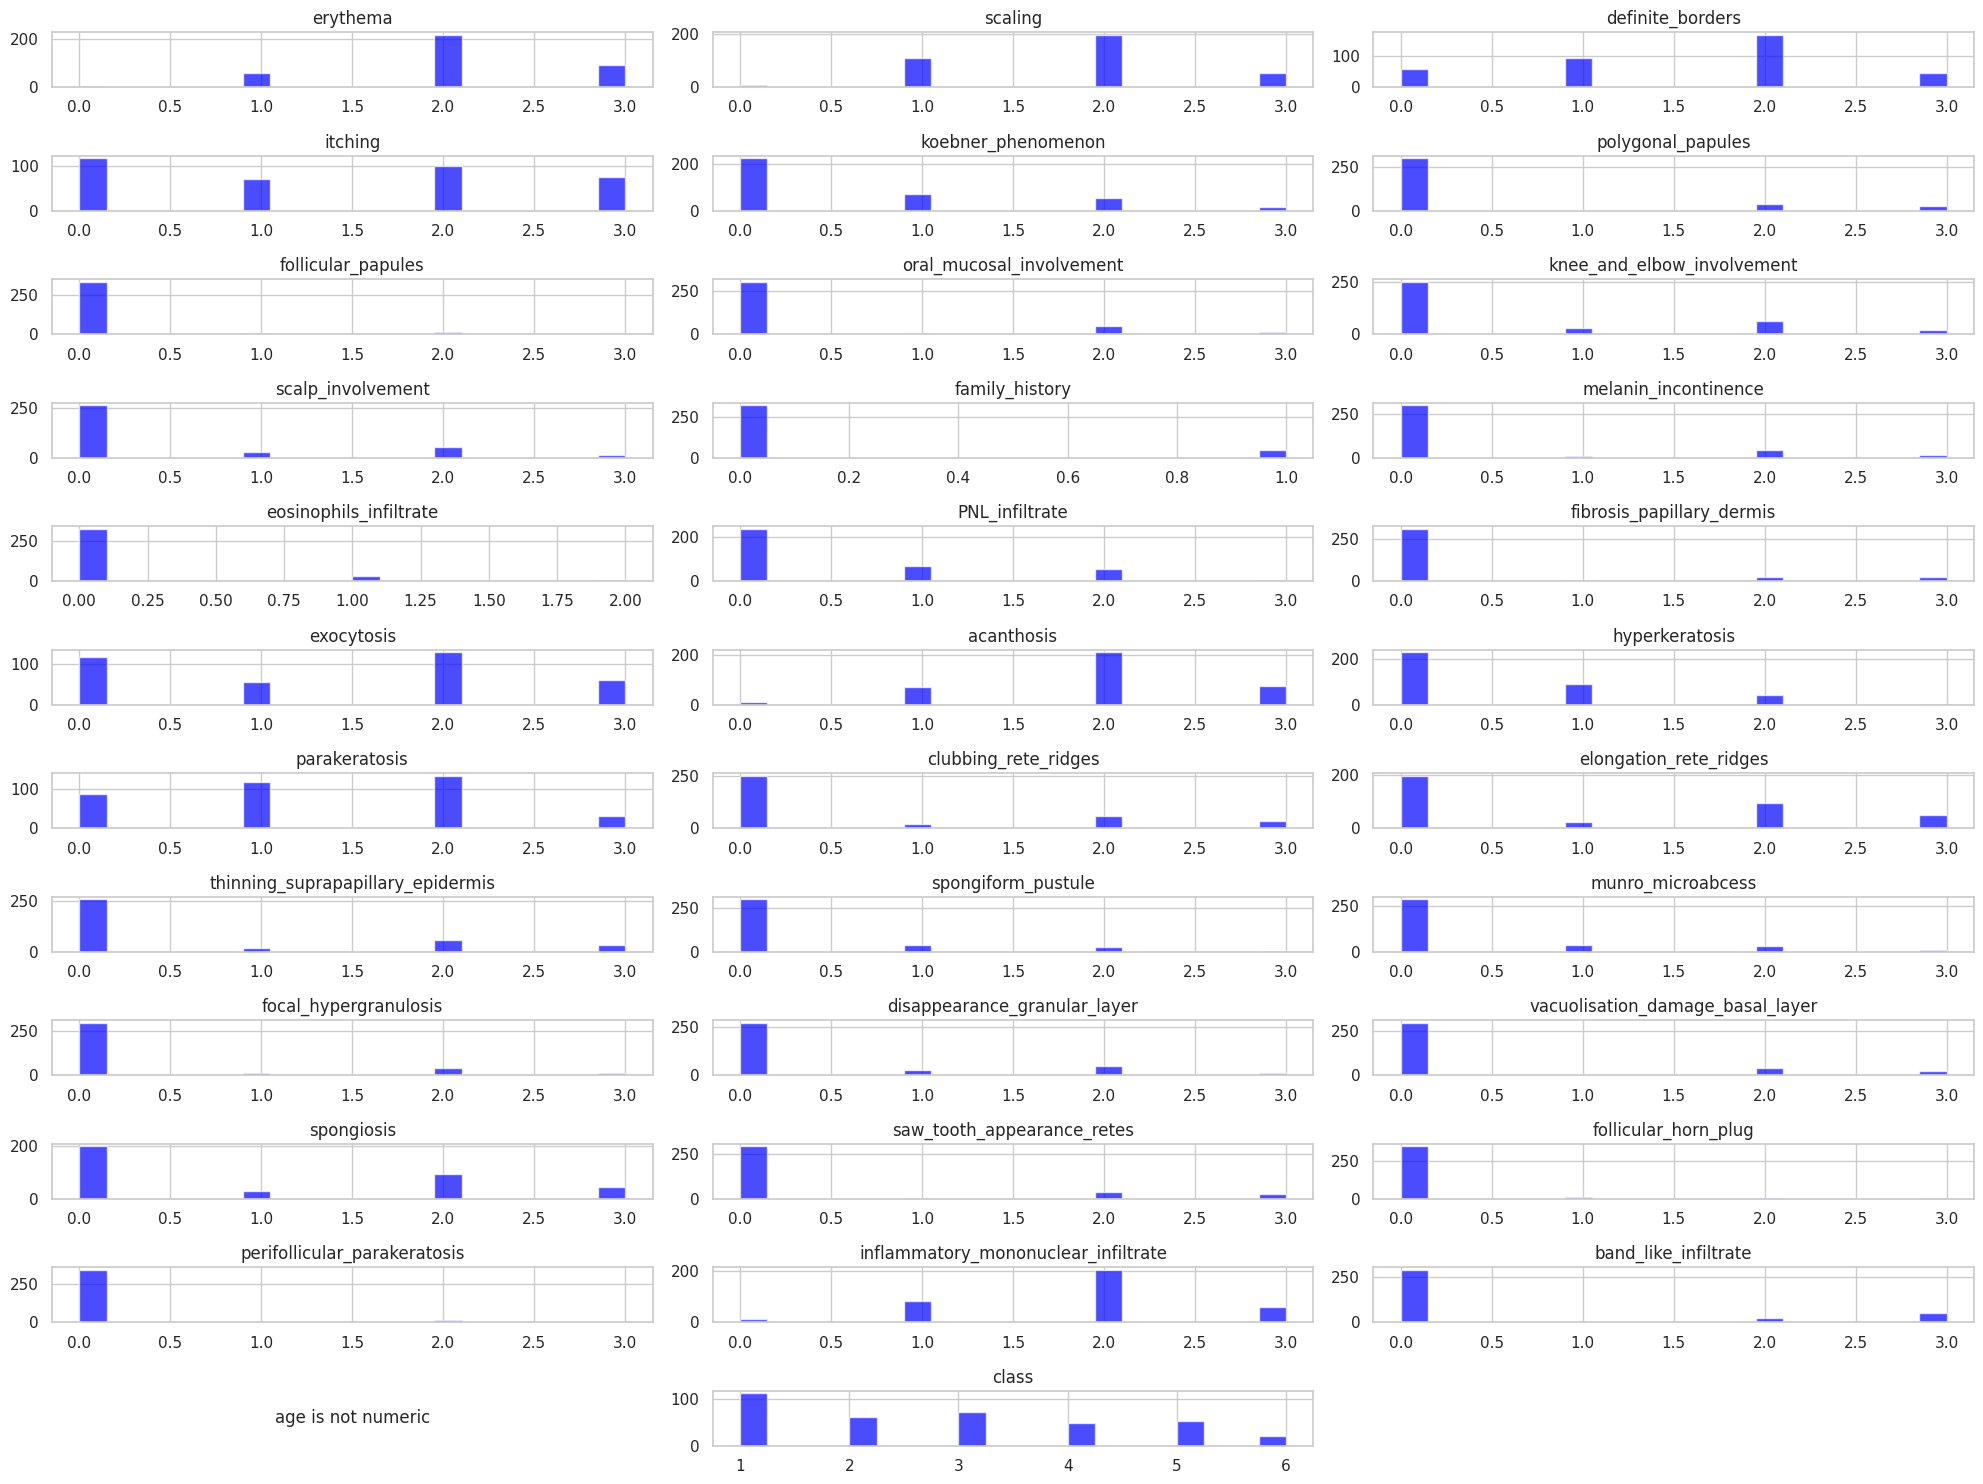

In [5]:

import matplotlib.pyplot as plt
columns = data.columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot((len(columns) + 2) // 3, 3, i)
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.hist(data[column], bins=20, color='blue', alpha=0.7)
        plt.title(column)
    else:
        plt.text(0.5, 0.5, f"{column} is not numeric", fontsize=12, ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import classification_report

print("Classification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm))

print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


Classification Report for SVM Model:
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         4.0       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
